In [1]:
%matplotlib inline
import os
import sys
import itertools
import string

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

import climatools.plot.plot
from climatools.html.html import *
from climatools.scripts.g1_threshold import *

from IPython import display

import imp
imp.reload(climatools.scripts.g1_threshold)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = Analysis()

In [3]:
crd = analysis.model('crd')
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu', 
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          '4.e-21',
                          'midlatitude_summer')
crd.type_model = 'crd'
crd.linestyle = '-'
crd.load_data()

In [4]:
clirad = analysis.model('clirad')
clirad.rundir = os.path.join('/nuwa_cluster/home/jackyu/radiation',
                             'clirad/LW/examples',
                             '1_0912_mdc_Steve_CLIRAD_lw',
                             'g1_threshold',
                             'n2o',
                             'band07_wn_1215_1380',
                             'P_50_T_250',
                             '4.e-21',
                             'tmp')
clirad.type_model = 'clirad'
clirad.linestyle = '--'
clirad.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig')
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])

In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
fig.display_hrefanchor()

In [9]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

# Figure: flux, cooling rate. g-group 1

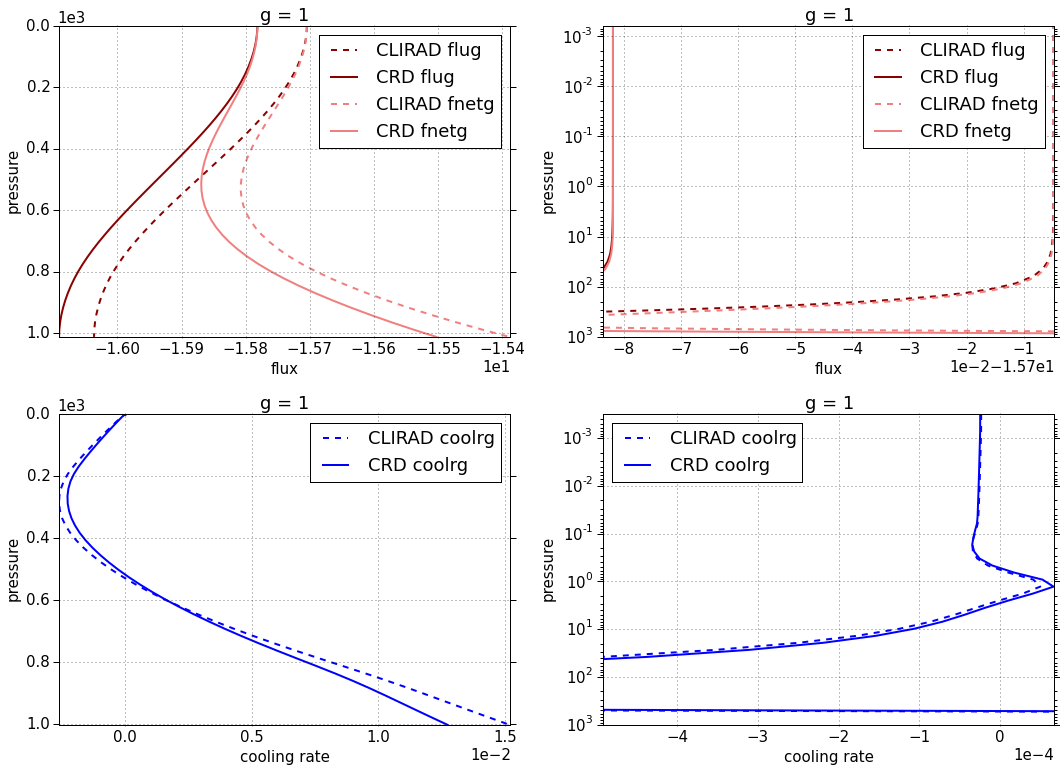

# Figure: flux, cooling rate. g-group 2

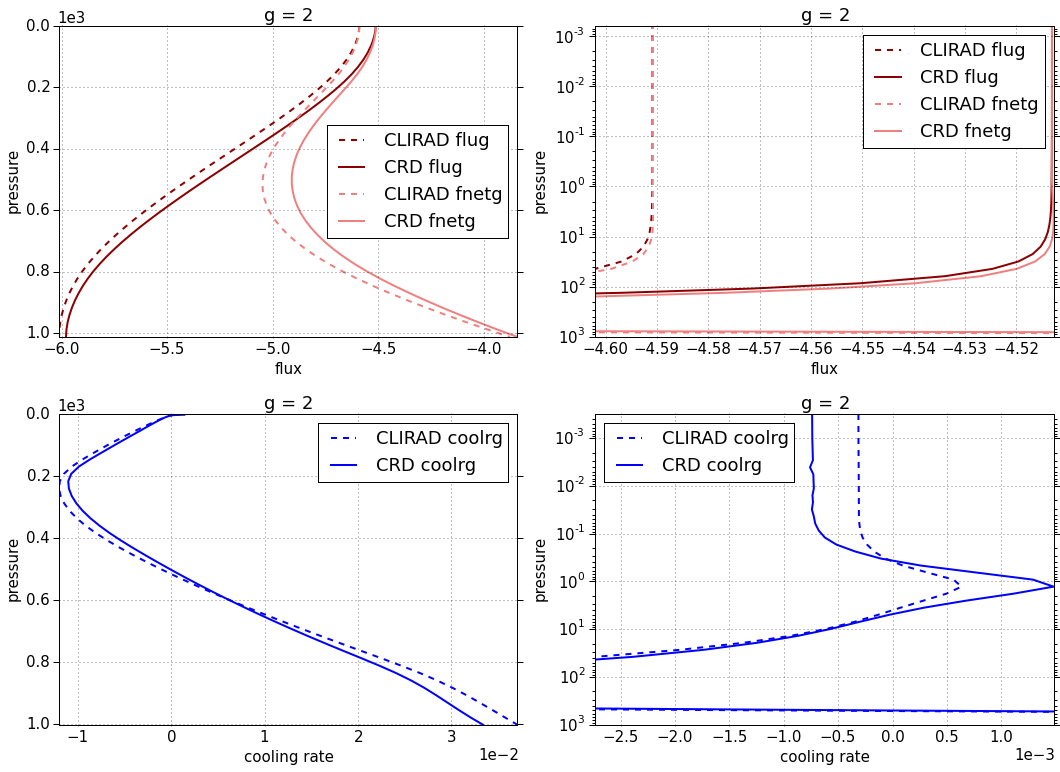

# Figure: flux, cooling rate. g-group 3

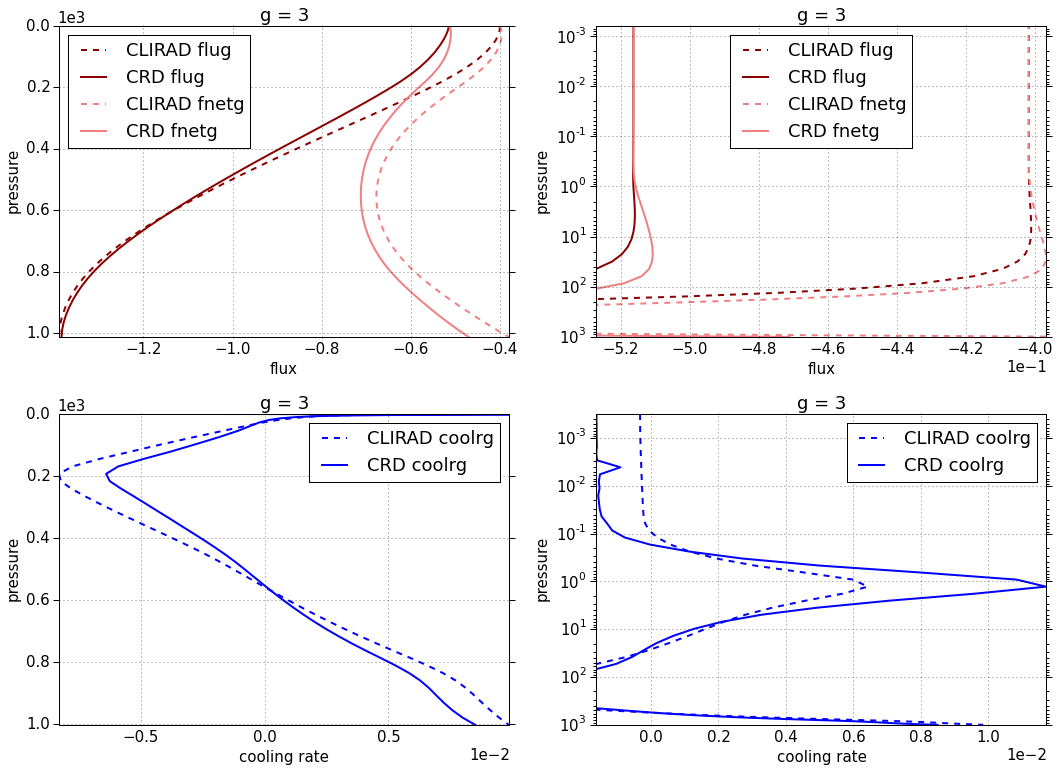

# Figure: flux, cooling rate. g-group 4

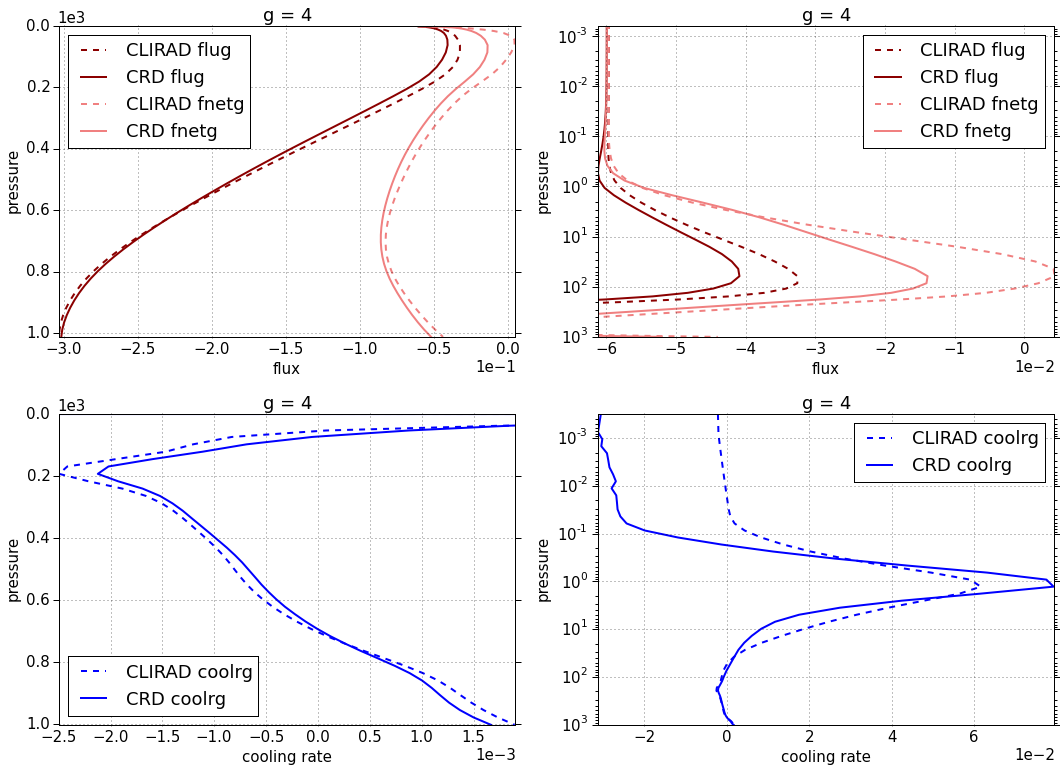

In [10]:
matplotlib.rcParams.update({'font.size': 15,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)

In [11]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.781963  0.000000 -15.781963
  1013     76    -16.090938  0.588028 -15.502910
2 0        1      -4.513059  0.000000  -4.513059
  1013     76     -5.979005  2.136721  -3.842284
3 0        1      -0.516288  0.000000  -0.516288
  1013     76     -1.383483  0.912395  -0.471088
4 0        1      -0.059940  0.000000  -0.059940
  1013     76     -0.301745  0.249674  -0.052071


CLIRAD


flug          fldg      fnetg
g pressure level                                    
1 0        1     -15.704752  2.672792e-13 -15.704752
  1013     76    -16.036479  6.475093e-01 -15.388969
2 0        1      -4.590877  4.912106e-12  -4.590877
  1013     76     -6.011898  2.134107e+00  -3.877790
3 0        1      -0.401811  2.367501e-11  -0.401811
  1013     76     -1.388980  1.007774e+00  -0.381206
4 0        1      -0.059677  5.419841e-10  -0.059677
  1013     76     -0.303245  2.592302e-01  -0.044015


CLIRAD - CRD


flug          fldg     fnetg
g pressure level                                  
1 0        1      0.077211  2.672792e-13  0.077211
  1013     76     0.054459  5.948160e-02  0.113941
2 0        1     -0.077817  4.912106e-12 -0.077817
  1013     76    -0.032892 -2.613900e-03 -0.035506
3 0        1      0.114476  2.367501e-11  0.114476
  1013     76    -0.005498  9.537980e-02  0.089882
4 0        1      0.000263  5.419841e-10  0.000263
  1013     76    -0.001500  9.555900e-03  0.008056

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012721
2 0.000312    1     -0.000740
  1001.112500 75     0.033380
3 0.000312    1     -0.001619
  1001.112500 75     0.008495
4 0.000312    1     -0.030518
  1001.112500 75     0.001665


CLIRAD


coolrg
g pressure    layer          
1 0.000312    1     -0.000023
  1001.112500 75     0.015165
2 0.000312    1     -0.000314
  1001.112500 75     0.037056
3 0.000312    1     -0.000325
  1001.112500 75     0.009847
4 0.000312    1     -0.002134
  1001.112500 75     0.001894


CLIRAD - CRD
Model indices not identical to benchmark indices, forcing model indices to be the same as benchmark's


coolrg
g pressure    layer          
1 0.000312    1      0.000001
  1001.112500 75     0.002445
2 0.000312    1      0.000426
  1001.112500 75     0.003676
3 0.000312    1      0.001294
  1001.112500 75     0.001352
4 0.000312    1      0.028384
  1001.112500 75     0.000229

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871251,0.000000,-20.871251
1013,76,-23.755171,3.886818,-19.868353



CLIRAD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.757118,5.708385e-10,-20.757118
1013,76,-23.740602,4.048621e+00,-19.691980



CLIRAD - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,0.114133,5.708385e-10,0.114133
1013,76,0.014569,1.618034e-01,0.176372


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.032901
1001.112500,75,0.056261



CLIRAD


,,coolrg
pressure,layer,
0.000312,1,-0.002796
1001.112500,75,0.063962



CLIRAD - CRD
Model indices not identical to benchmark indices, forcing model indices to be the same as benchmark's


,,coolrg
pressure,layer,
0.000312,1,0.030104
1001.112500,75,0.007702


In [12]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')